In [188]:
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import log
from math import exp
#from scipy.stata import boxcox
from pandas import DataFrame
from pandas import Grouper
from pandas import Series
from pandas import concat
from pandas.plotting import lag_plot
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#from statsmodels.graphics.gofplot import qqplot
import warnings; warnings.simplefilter('ignore')


In [189]:
def parser(s):
    return datetime.strptime(s, "%Y-%m-%d")

In [190]:
# Load Data
data = pd.read_csv('/datc/parcel/notebooks/data/postnl/20201014_300_klanten.csv', parse_dates=[0])

In [191]:
cust_filter = data['cust_id'] == 'klant_266'
date_filter = data['procesdag'].dt.dayofweek <= 4
data = data.where(date_filter & cust_filter).dropna()

data['procesdag']=pd.to_datetime(data['procesdag'])
data = data.set_index(data.procesdag, drop=True)
data = data['2016-01-01':'2018-01-01']

In [192]:
data.head()

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
procesdag,,,,,
2016-01-01,2016-01-01,klant_266,0.0,0.0,train
2016-01-04,2016-01-04,klant_266,172.0,44.0,train
2016-01-05,2016-01-05,klant_266,44.0,54.0,train
2016-01-06,2016-01-06,klant_266,54.0,53.0,train
2016-01-07,2016-01-07,klant_266,53.0,43.0,train


In [193]:
data.drop(['procesdag'], axis='columns', inplace=True)

In [194]:
data.drop(['aantal_pakketten_volgende_dag'], axis='columns', inplace=True)

In [195]:
data.head()

,cust_id,aantal_pakketten,validation_column
procesdag,,,
2016-01-01,klant_266,0.0,train
2016-01-04,klant_266,172.0,train
2016-01-05,klant_266,44.0,train
2016-01-06,klant_266,54.0,train
2016-01-07,klant_266,53.0,train


In [196]:
print(data.describe())

       aantal_pakketten
count        522.000000
mean          49.072797
std           37.244207
min            0.000000
25%           24.000000
50%           38.000000
75%           63.000000
max          198.000000


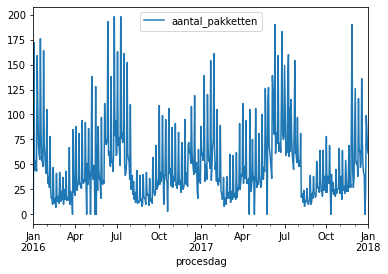

In [197]:
data.plot()

In [198]:
split_point = len(data) - 122
dataset, validation = data[0:split_point], data[split_point:]
print('Train-Dataset: %d, Validation-Dataset: %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Train-Dataset: 400, Validation-Dataset: 122


In [199]:
X = data.values
#X = X.astype('float32')
train_size = int(len(X) * 0.5)
train, test = X[0:train_size], X[train_size:]

In [200]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat= history[-1]
    predictions.append(yhat)
    obs=test[i]
    history.append(obs)
    print('>Forecast=%.3f, Actual=%3.f % (yhat,obs)')
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f'%rmse)

>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, Actual=%3.f % (yhat,obs)
>Forecast=%.3f, 

ValueError: could not convert string to float: 'train'